In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [10]:
weight = 9
bias = 1

In [11]:
start = 0
end = 1
step = 0.01

In [12]:
# creating data
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = bias + weight*x
x[:5],y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[1.0000],
         [1.0900],
         [1.1800],
         [1.2700],
         [1.3600]]))

In [13]:
# device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"

In [14]:
# creating train split
train_split = int(0.8 * len(x))
X_train = x[:train_split].to(device)
Y_train = y[:train_split].to(device)
X_test = x[train_split:].to(device)
Y_test = y[train_split:].to(device)
len(X_train),len(Y_train)

(80, 80)

In [15]:
# creating a Linear regression model
class regression_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1,
                             out_features = 1)
  def forward(self,x:torch.tensor) ->torch.tensor:
    return self.linear_layer(x)

# setting up manual seed
torch.manual_seed(56)
pranav = regression_model().to(device)
pranav,pranav.state_dict()

(regression_model(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.9062]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.1214], device='cuda:0'))]))

In [16]:
def plotting(train_data = X_train.cpu(),train_label = Y_train.cpu(),test_data =X_test.cpu(),test_label = Y_test.cpu(),prediction = None):
    plt.figure(figsize=(10,7))
    
    
    # plots trainng data in blue
    plt.scatter(train_data,train_label, c="b", s=4, label = "training Data")
    
    
    #plots testing data in green
    plt.scatter(test_data, test_label, c="green", s=4, label = "testing data")
    
    
    # plotting prediction in red
    if prediction is not None:
        plt.scatter(test_data,prediction,c="r",s=4,label="Predictions")
    
    plt.legend(prop={"size": 14});

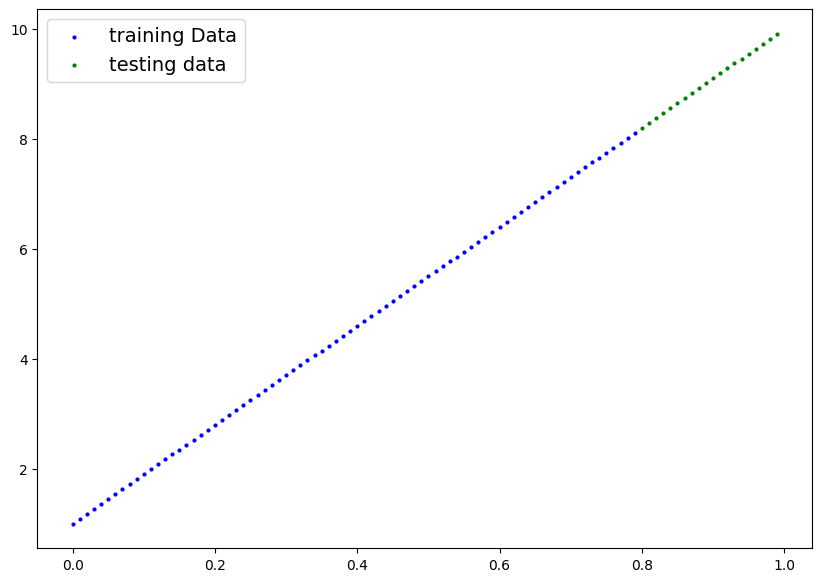

In [17]:
plotting()

In [18]:
next(pranav.parameters()).to(device)

Parameter containing:
tensor([[0.9062]], device='cuda:0', requires_grad=True)

In [19]:
# plotting initial data
with torch.inference_mode():
    y_pred = pranav(X_test)

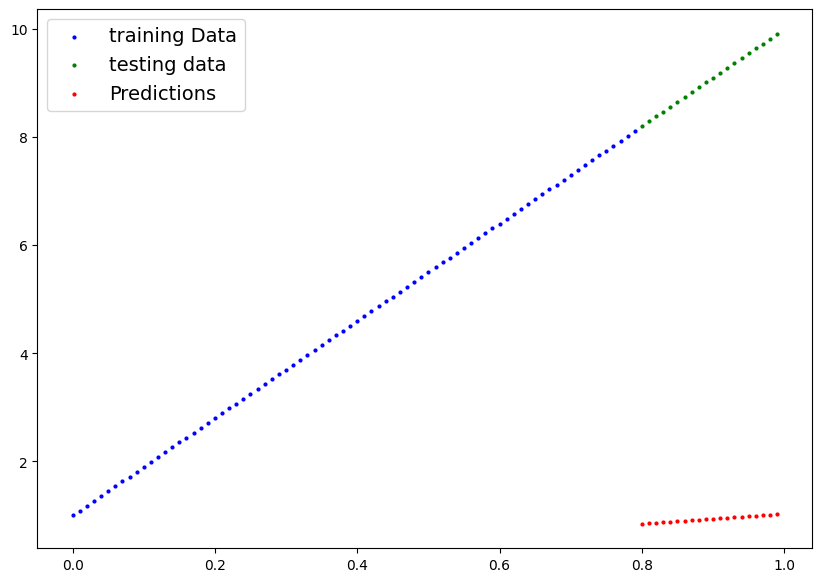

In [20]:
plotting(prediction= y_pred.cpu())

In [21]:
# loss functon
loss_fn = nn.L1Loss()
# optimizer
optimizer = torch.optim.SGD(params = pranav.parameters(),lr = 0.01)

In [53]:
# trainig loop
epoche = 200
for epoch in range(epoche):
    pranav.train()
    # forward pass
    y_pred = pranav(X_train)
    # loss
    loss = loss_fn(y_pred,Y_train)
    # zero grad 
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # optimizer step
    optimizer.step()
    # testing loop
    pranav.eval()
    with torch.inference_mode():
        test_pred = pranav(X_test)
        test_loss = loss_fn(test_pred, Y_test)
    if epoch % 10 == 0:
        print(f"epoche: {epoch} | test loss: {test_loss} | loss: {loss}")
print(pranav.state_dict())

epoche: 0 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 10 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 20 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 30 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 40 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 50 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 60 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 70 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 80 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 90 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 100 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 110 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 120 | test loss: 0.01350107230246067 | loss: 0.0024645940866321325
epoche: 130 | test loss: 0.013501072

In [23]:
weight,bias

(9, 1)

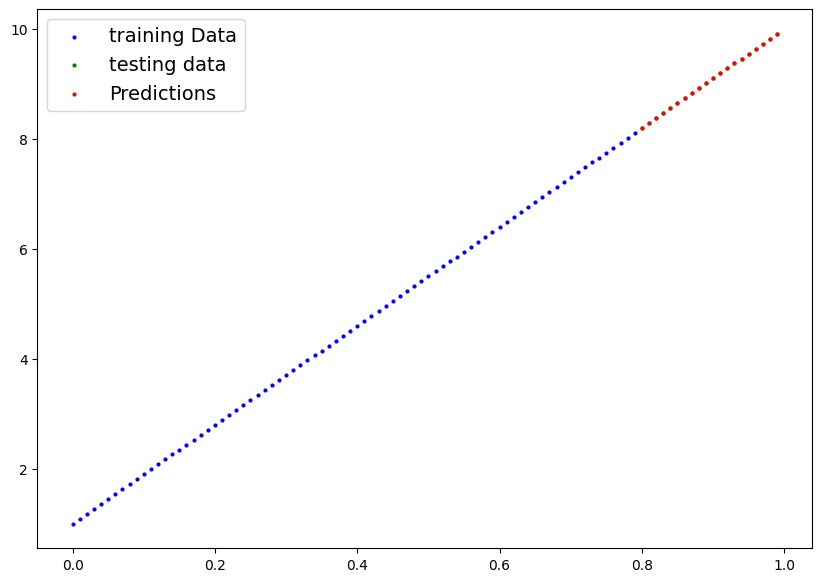

In [54]:
with torch.inference_mode():
    new_y_pred = pranav(X_test)
plotting(prediction = new_y_pred.cpu())

In [55]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

model_name = "pranav_model_001.pth"
model_save_path = model_path/model_name

torch.save(f = model_save_path,obj = pranav.state_dict())